<a href="https://colab.research.google.com/github/sutharshan17/NYIT-Crypto-ExtendedEuclidean/blob/main/XGBoost_model_and_qml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install xgboost imbalanced-learn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(49531, 31)

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data = data.dropna()

# Verify missing values again
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

<ipython-input-8-477b4865bac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.223278,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.356722,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.127403,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.120170,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.091058,0.0


In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(49312, 31)

In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,49164
1.0,148


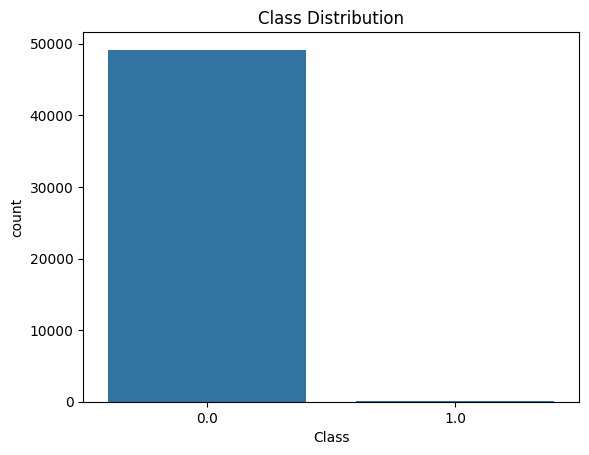

In [ ]:
# Plot class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()




In [ ]:
# Separate features and target
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply Random Under-Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Check the new class distribution after sampling
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())
print("Class distribution after Random Under-Sampling:\n", pd.Series(y_train_under).value_counts())

Class distribution after SMOTE:
 Class
0.0    39331
1.0    39331
Name: count, dtype: int64
Class distribution after Random Under-Sampling:
 Class
0.0    118
1.0    118
Name: count, dtype: int64


In [ ]:
# Initialize XGBoost model
xgb_model = XGBClassifier(learning_rate=0.1, random_state=42)

# Train on original data
xgb_model.fit(X_train, y_train)

# Train on SMOTE data
xgb_model_smote = XGBClassifier(learning_rate=0.1, random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Train on under-sampled data
xgb_model_under = XGBClassifier(learning_rate=0.1, random_state=42)
xgb_model_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Evaluation for Original Data:
Accuracy: 0.9993
Precision: 0.9259
Recall (Sensitivity): 0.8333
Specificity: 0.9998
F1-score: 0.8772
ROC-AUC: 0.9835


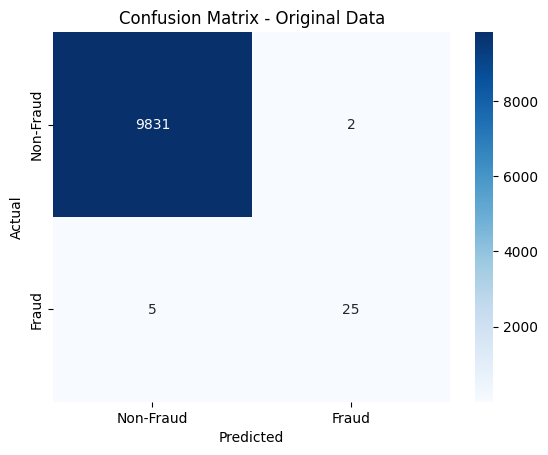

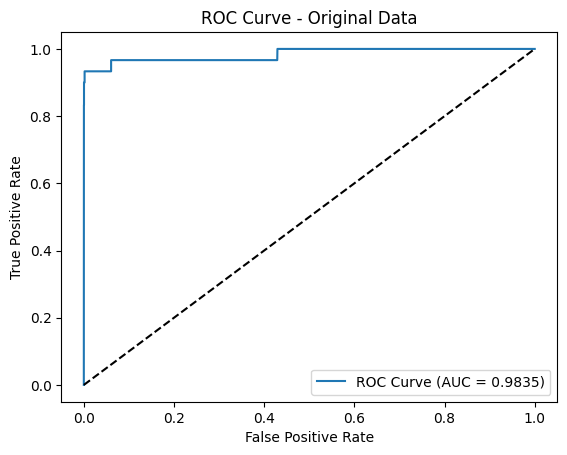

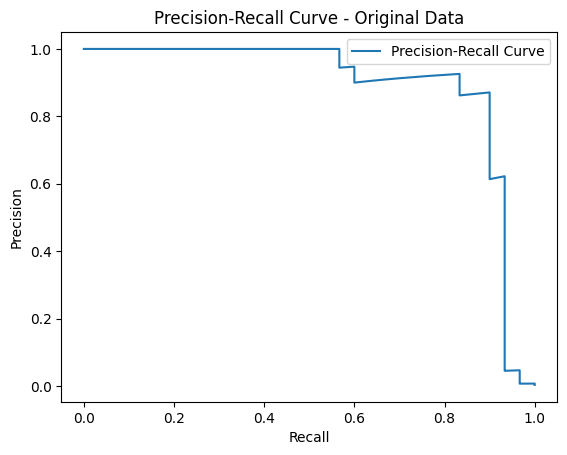

Evaluation for SMOTE Data:
Accuracy: 0.9989
Precision: 0.8276
Recall (Sensitivity): 0.8000
Specificity: 0.9995
F1-score: 0.8136
ROC-AUC: 0.9912


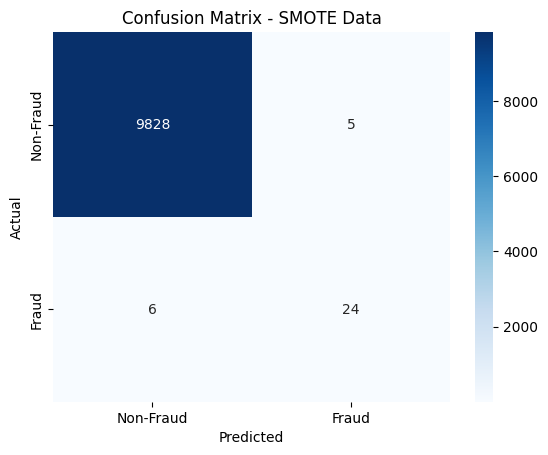

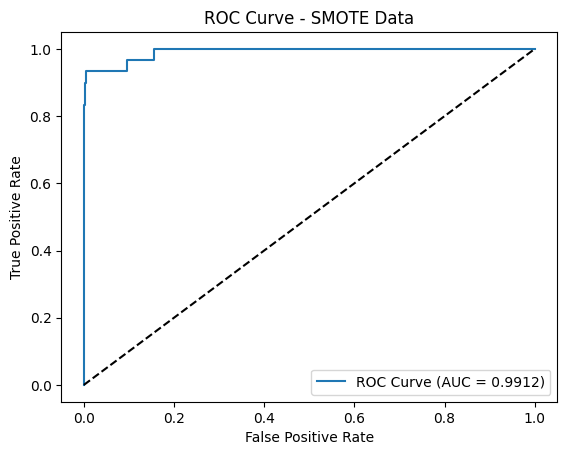

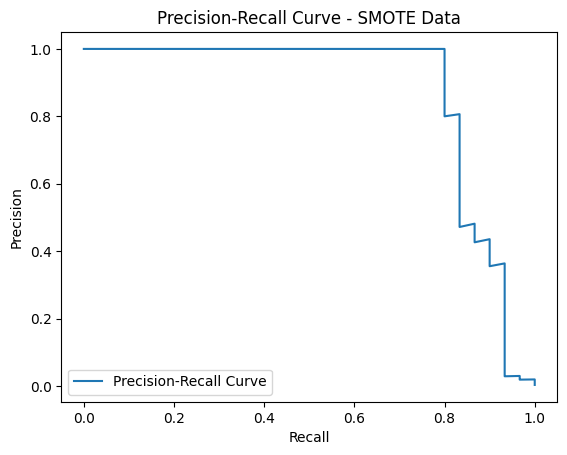

Evaluation for Under-Sampled Data:
Accuracy: 0.9826
Precision: 0.1450
Recall (Sensitivity): 0.9667
Specificity: 0.9826
F1-score: 0.2522
ROC-AUC: 0.9952


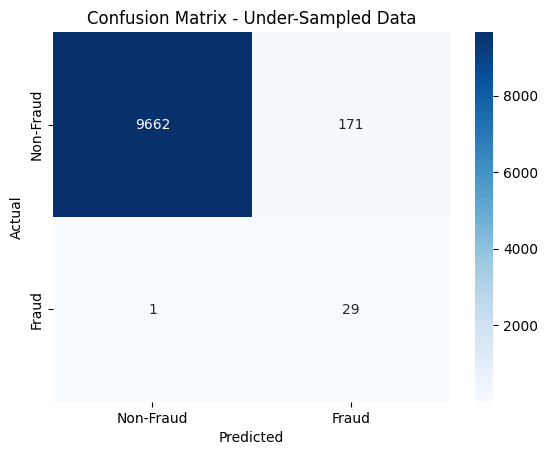

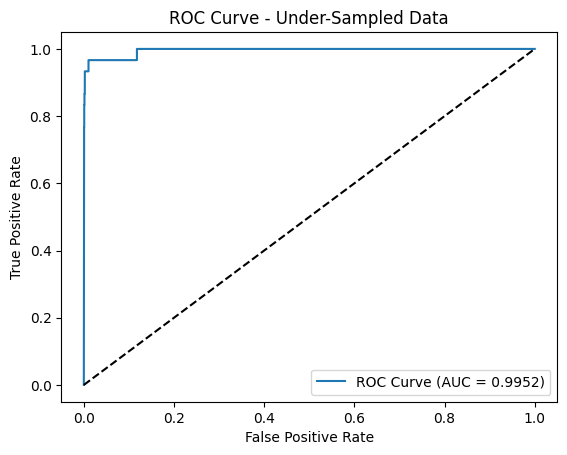

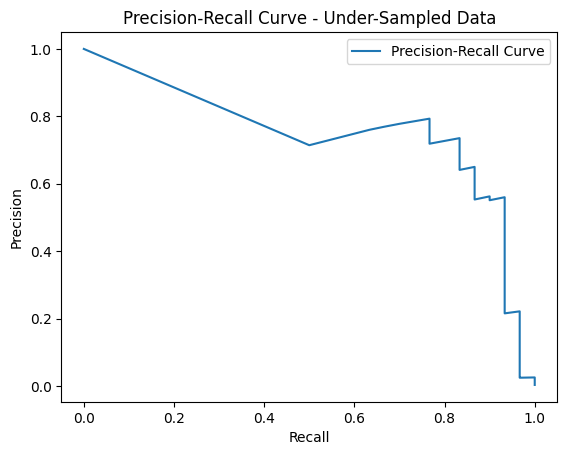

In [ ]:
# Function to evaluate the model (updated to include specificity)
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # Specificity calculation

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion matrix plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

# Evaluate on original data
evaluate_model(xgb_model, X_test, y_test, "Original Data")

# Evaluate on SMOTE data
evaluate_model(xgb_model_smote, X_test, y_test, "SMOTE Data")

# Evaluate on under-sampled data
evaluate_model(xgb_model_under, X_test, y_test, "Under-Sampled Data")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, scoring='f1', cv=3)

# Fit on SMOTE data (or any other dataset)
grid_search.fit(X_train_smote, y_train_smote)

# Best learning rate
print("Best learning rate:", grid_search.best_params_['learning_rate'])

Best learning rate: 0.3


   Learning Rate  Accuracy  Precision    Recall  F1-score   ROC-AUC
0           0.01  0.997161   0.520000  0.866667  0.650000  0.962111
1           0.05  0.998783   0.800000  0.800000  0.800000  0.993139
2           0.10  0.998885   0.827586  0.800000  0.813559  0.991227
3           0.20  0.998885   0.827586  0.800000  0.813559  0.983267
4           0.30  0.998885   0.827586  0.800000  0.813559  0.980020


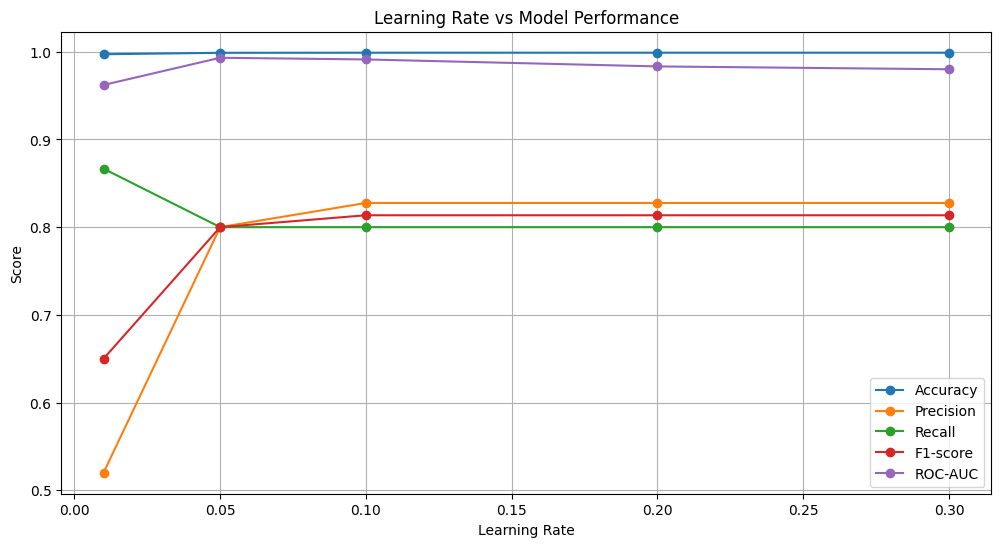

In [ ]:
# Define a range of learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

# Initialize lists to store results
results = []

# Train and evaluate models with different learning rates
for lr in learning_rates:
    # Initialize and train the model
    model = XGBClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train_smote, y_train_smote)  # Using SMOTE data for balanced training

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Append results
    results.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })

# Convert results to a DataFrame
results_data = pd.DataFrame(results)

# Display the results
print(results_data)

# Plot learning rate vs metrics
plt.figure(figsize=(12, 6))
plt.plot(results_data['Learning Rate'], results_data['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_data['Learning Rate'], results_data['Precision'], label='Precision', marker='o')
plt.plot(results_data['Learning Rate'], results_data['Recall'], label='Recall', marker='o')
plt.plot(results_data['Learning Rate'], results_data['F1-score'], label='F1-score', marker='o')
plt.plot(results_data['Learning Rate'], results_data['ROC-AUC'], label='ROC-AUC', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Learning Rate vs Model Performance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install pennylane scikit-learn imbalanced-learn matplotlib seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 61.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

In [ ]:
import numpy as np
import pandas as pd
import pennylane as qml
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pennylane.optimize import AdamOptimizer

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Check for NaN values in y
print("Number of NaN values in y:", data['Class'].isnull().sum())

# Drop rows with NaN values in y
data = data.dropna(subset=['Class'])
X = data.drop(columns=['Class'])
y = data['Class']

# Verify that NaN values are removed
print("Number of NaN values in y after dropping:", y.isnull().sum())

# Balancing Dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Data Splitting for Balanced Dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Normalize Data (Quantum circuits work better with normalized data)
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Check the shape of the data
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Number of NaN values in y: 1
Number of NaN values in y after dropping: 0
Training Data Shape: (79011, 30)
Test Data Shape: (19753, 30)


In [ ]:
import numpy as np
import pennylane as qml

# Quantum Setup
num_qubits = 10  # Reduce the number of qubits
num_layers = 1   # Reduce the number of layers
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum Circuit
def quantum_circuit(params, x):
    # Embed classical data into quantum state
    qml.AngleEmbedding(x, wires=range(num_qubits))

    # Variational layers
    for layer in range(num_layers):
        for qubit in range(num_qubits):
            qml.RX(params[layer, qubit, 0], wires=qubit)
            qml.RY(params[layer, qubit, 1], wires=qubit)
            qml.RZ(params[layer, qubit, 2], wires=qubit)
        # Entanglement
        for qubit in range(num_qubits - 1):
            qml.CNOT(wires=[qubit, qubit + 1])

    # Measure expectation value of Pauli-Z on the first qubit
    return qml.expval(qml.PauliZ(0))

# Quantum Node
@qml.qnode(dev)
def quantum_model(params, x):
    return quantum_circuit(params, x)

# Test quantum model with one sample
x_sample = np.random.randn(num_qubits)  # Example input (should match feature size)
params_sample = np.random.randn(num_layers, num_qubits, 3)  # Example params
output = quantum_model(params_sample, x_sample)
print("Quantum Model Output for a Sample:", output)


Quantum Model Output for a Sample: 0.8725111315805426


In [ ]:
import autograd.numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Quantum Setup
num_qubits = 10
num_layers = 1
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum Circuit
def quantum_circuit(params, x):
    qml.AngleEmbedding(x, wires=range(num_qubits))
    for layer in range(num_layers):
        for qubit in range(num_qubits):
            qml.RX(params[layer, qubit, 0], wires=qubit)
            qml.RY(params[layer, qubit, 1], wires=qubit)
            qml.RZ(params[layer, qubit, 2], wires=qubit)
        for qubit in range(num_qubits - 1):
            qml.CNOT(wires=[qubit, qubit + 1])
    return qml.expval(qml.PauliZ(0))

# Quantum Node
@qml.qnode(dev, interface='autograd')
def quantum_model(params, x):
    return quantum_circuit(params, x)

# Training and Testing Data
X = np.random.randn(100, num_qubits)  # Replace with actual data
y = np.random.randint(0, 2, size=100)  # Binary classification labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Loop
def train_qnn(X_train, y_train, learning_rate=0.01, epochs=10):
    params = np.random.randn(num_layers, num_qubits, 3)
    opt = qml.GradientDescentOptimizer(stepsize=learning_rate)
    for epoch in range(epochs):
        for i in range(len(X_train)):
            params, _ = opt.step_and_cost(lambda p: np.square(y_train[i] - quantum_model(p, X_train[i])), params)
    return params

# Train the model
params = train_qnn(X_train, y_train)

# Predictions
y_pred_train = [1 if quantum_model(params, x) > 0 else 0 for x in X_train]
y_pred_test = [1 if quantum_model(params, x) > 0 else 0 for x in X_test]

# Metrics Calculation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Output Results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Training Accuracy: 0.5125
Testing Accuracy: 0.5000
Precision: 0.3750
Recall: 0.3750
F1-score: 0.3750


**Logistic Regression and Quantum SVM (LRQSVM)**:

1. logistic Regression
2. Quantum SVM
⏰






In [ ]:
!pip install pennylane


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.4 MB/s eta 0:00:00


Computing Quantum Kernel Matrix (Training)...
Computing Quantum Kernel Matrix (Testing)...

📊 Logistic Regression Performance:
Accuracy: 0.9500
Precision: 0.9655
Recall (Sensitivity): 0.9333
Specificity: 0.9667
F1 Score: 0.9492
Effort Score: 0.9494

📊 Quantum SVM Performance:
Accuracy: 0.9167
Precision: 0.8788
Recall (Sensitivity): 0.9667
Specificity: 0.8667
F1 Score: 0.9206
Effort Score: 0.9227

📊 Hybrid Model Performance:
Accuracy: 0.9500
Precision: 0.9655
Recall (Sensitivity): 0.9333
Specificity: 0.9667
F1 Score: 0.9492
Effort Score: 0.9494


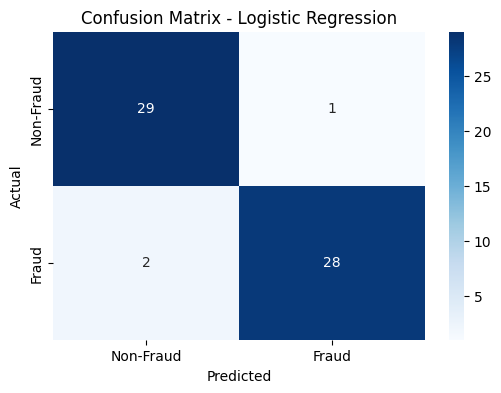

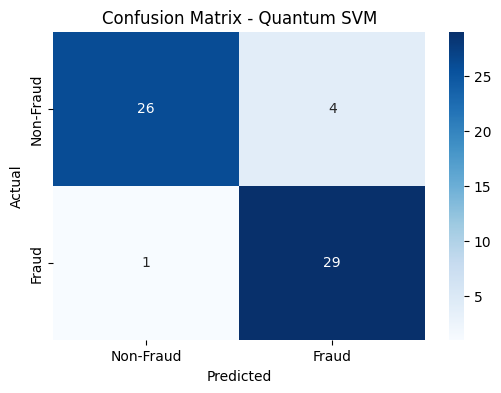

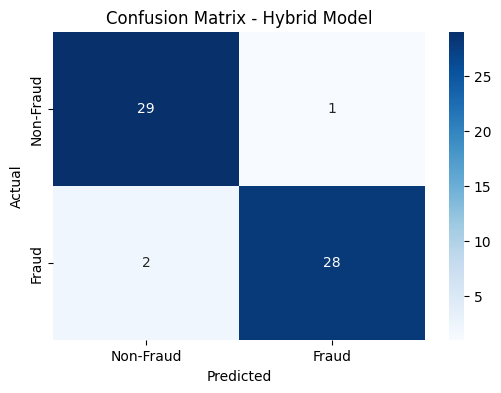

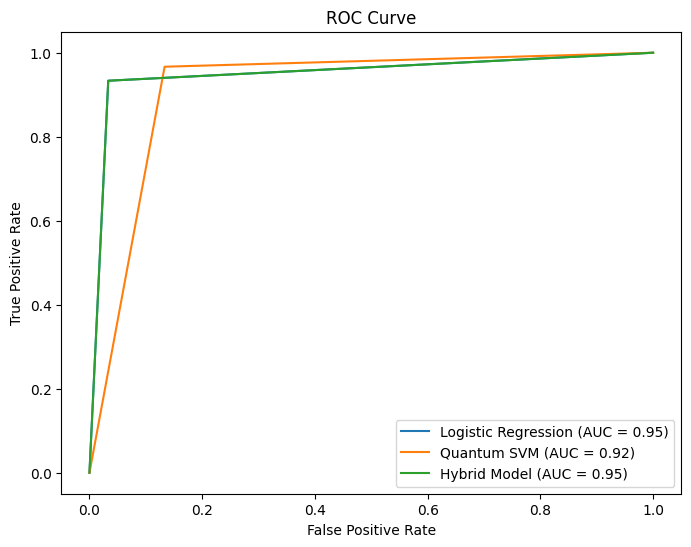


📊 Hybrid Model (LR=0.01) Performance:
Accuracy: 0.9167
Precision: 0.8788
Recall (Sensitivity): 0.9667
Specificity: 0.8667
F1 Score: 0.9206
Effort Score: 0.9227

📊 Hybrid Model (LR=0.12) Performance:
Accuracy: 0.9167
Precision: 0.8788
Recall (Sensitivity): 0.9667
Specificity: 0.8667
F1 Score: 0.9206
Effort Score: 0.9227

📊 Hybrid Model (LR=0.23) Performance:
Accuracy: 0.9167
Precision: 0.8788
Recall (Sensitivity): 0.9667
Specificity: 0.8667
F1 Score: 0.9206
Effort Score: 0.9227

📊 Hybrid Model (LR=0.34) Performance:
Accuracy: 0.9167
Precision: 0.8788
Recall (Sensitivity): 0.9667
Specificity: 0.8667
F1 Score: 0.9206
Effort Score: 0.9227

📊 Hybrid Model (LR=0.45) Performance:
Accuracy: 0.9167
Precision: 0.8788
Recall (Sensitivity): 0.9667
Specificity: 0.8667
F1 Score: 0.9206
Effort Score: 0.9227

📊 Hybrid Model (LR=0.56) Performance:
Accuracy: 0.9500
Precision: 0.9655
Recall (Sensitivity): 0.9333
Specificity: 0.9667
F1 Score: 0.9492
Effort Score: 0.9494

📊 Hybrid Model (LR=0.67) Performa

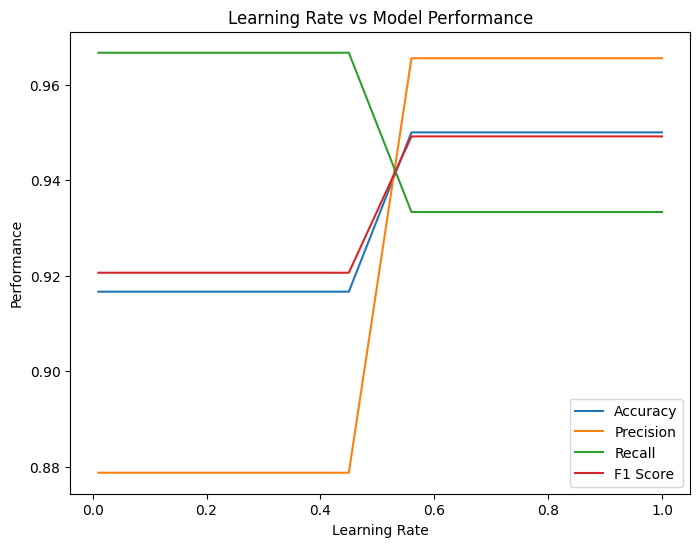

In [ ]:

import time
import pennylane as qml
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')



# Define feature matrix (X) and target variable (y)
data = data.dropna(subset=['Class'])
X = data.drop(['Class', 'Time'], axis=1)  # Exclude 'Time'
selected_features = X.columns[:10]  # Select the first 10 numerical features
X = X[selected_features]  # Keep only 10 features
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Undersample to balance class distribution
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define Quantum Device
dev = qml.device("lightning.qubit", wires=10)  # Match number of features

# Quantum Kernel Function
def quantum_kernel(inputs1, inputs2):
    @qml.qnode(dev)
    def circuit(x1, x2):
        qml.AngleEmbedding(x1, wires=range(len(x1)))
        qml.adjoint(qml.AngleEmbedding)(x2, wires=range(len(x2)))
        return qml.probs(wires=range(len(x1)))

    probs = circuit(inputs1, inputs2)
    return probs[0]

# Compute Quantum Kernel Matrix in Batches
def compute_batch(start_idx, end_idx, X_data1, X_data2):
    return np.array([[quantum_kernel(X_data1[i], X_data2[j]) for j in range(len(X_data2))]
                     for i in range(start_idx, end_idx)])

def compute_kernel_matrix_parallel(X_data1, X_data2, batch_size=50):
    total_rows = len(X_data1)
    kernel_matrix = np.zeros((total_rows, len(X_data2)))

    with multiprocessing.Pool() as pool:
        results = pool.starmap(compute_batch, [(i, min(i + batch_size, total_rows), X_data1, X_data2)
                                               for i in range(0, total_rows, batch_size)])

    return np.vstack(results)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.1)
log_reg.fit(X_train, y_train)

# Train Quantum SVM
print("Computing Quantum Kernel Matrix (Training)...")
kernel_matrix_train = compute_kernel_matrix_parallel(X_train, X_train)

print("Computing Quantum Kernel Matrix (Testing)...")
kernel_matrix_test = compute_kernel_matrix_parallel(X_test, X_train)

qsvm = SVC(kernel='precomputed')
qsvm.fit(kernel_matrix_train, y_train)

# Predict using Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Predict using Quantum SVM
y_pred_qsvm = qsvm.predict(kernel_matrix_test)

# Hybrid Model Predictions (Weighted Average)
hybrid_preds = (0.5 * y_pred_log_reg + 0.5 * y_pred_qsvm).round().astype(int)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    effort_score = (precision + recall) / 2  # Custom metric

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Effort Score: {effort_score:.4f}")

    return accuracy, precision, recall, f1, specificity, effort_score

# Evaluate Models
metrics_log_reg = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
metrics_qsvm = evaluate_model(y_test, y_pred_qsvm, "Quantum SVM")
metrics_hybrid = evaluate_model(y_test, hybrid_preds, "Hybrid Model")

# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_qsvm, "Quantum SVM")
plot_confusion_matrix(y_test, hybrid_preds, "Hybrid Model")

# ROC Curves
def plot_roc_curve(y_true, y_pred_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_log_reg, "Logistic Regression")
plot_roc_curve(y_test, y_pred_qsvm, "Quantum SVM")
plot_roc_curve(y_test, hybrid_preds, "Hybrid Model")
plt.show()

# Learning Rate vs Model Performance
learning_rates = np.linspace(0.01, 1.0, 10)
performances = {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

for lr in learning_rates:
    hybrid_preds = (lr * y_pred_log_reg + (1 - lr) * y_pred_qsvm).round().astype(int)
    acc, prec, rec, f1, _, _ = evaluate_model(y_test, hybrid_preds, f"Hybrid Model (LR={lr:.2f})")

    performances["Accuracy"].append(acc)
    performances["Precision"].append(prec)
    performances["Recall"].append(rec)
    performances["F1 Score"].append(f1)

plt.figure(figsize=(8, 6))
for metric, values in performances.items():
    plt.plot(learning_rates, values, label=metric)

plt.xlabel("Learning Rate")
plt.ylabel("Performance")
plt.title("Learning Rate vs Model Performance")
plt.legend()
plt.show()